This notebook is based on code written by: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Generate Data

In [87]:
rng = np.random.RandomState(1) # set the random state
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T # Transform 2D normal data along axis given by matrix
print("The dimensions of X are", X.shape) 
Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is", Xm)
print("The standard deviation is", Xs)
print("The variance is", Xv)
Cx = np.cov(X.T, bias=True)
print("The co-variance matrix is\n", Cx)

The dimensions of X are (200, 2)
The mean is [ 0.03351168 -0.00408072]
The standard deviation is [0.823873   0.31358832]
The variance is [0.67876672 0.09833763]
The co-variance matrix is
 [[0.67876672 0.22978007]
 [0.22978007 0.09833763]]


In [89]:
Xn = (X-Xm)/Xs
print("Mean after normalisation", np.mean(Xn, axis=0))
print("Standard deviation after normalisation", np.std(Xn, axis=0))
print("Variance after normalisation", np.var(Xn, axis=0))
print("Total Variance after normalisation", np.sum(np.var(Xn, axis=0)))

Mean after normalisation [-3.10862447e-17  0.00000000e+00]
Standard deviation after normalisation [1. 1.]
Variance after normalisation [1. 1.]
Total Variance after normalisation 1.9999999999999996


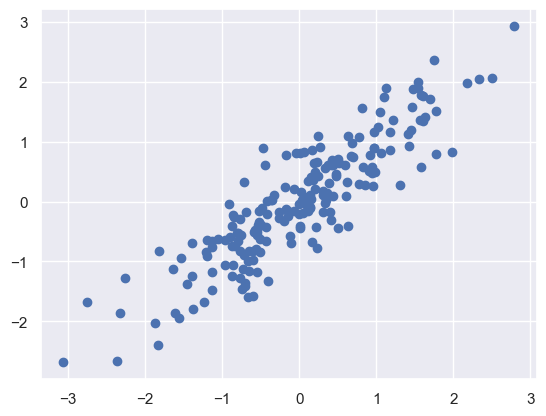

In [90]:
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.show()

In [12]:
C = np.cov(Xn.T, bias=True)
print("Covariance matrix Dimensionality is: ", C.shape)
print("Covariance matrix is\n", C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.88938995]
 [0.88938995 1.        ]]


# Apply PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [14]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [15]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


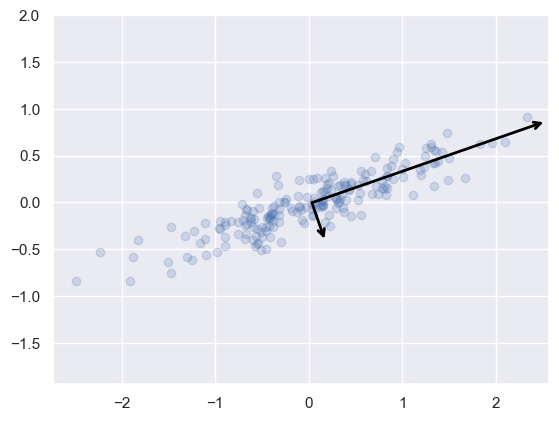

In [23]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color="black",
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ - v) # used -v here, instead of +v used in orginal code to get same plot
plt.axis('equal');

In [24]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


# Comparison

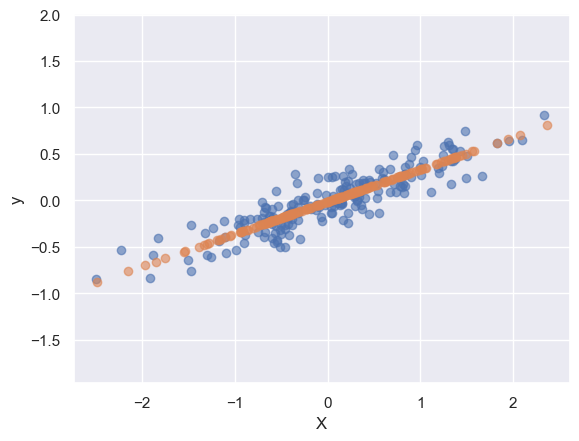

In [32]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.6)
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("y")
plt.savefig("pca_example.pdf")

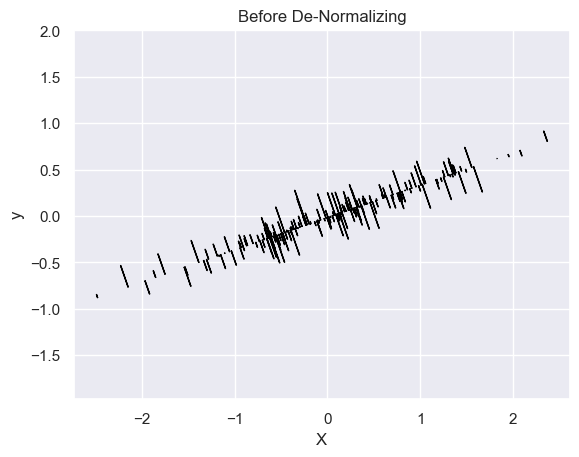

In [28]:
#plt.scatter(X[:, 0], X[:, 1], marker='+')
#plt.scatter(X_new[:, 0], X_new[:, 1])
#plt.legend(['Original', 'Reprojection'])
for x, xr in zip(X, X_new):    
    plt.arrow(x[0], x[1], xr[0]-x[0], xr[1]-x[1], color="black")
plt.title('Before De-Normalizing')
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("y")
plt.show()